In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Prepare Data
The next step is to prepare the data that we want to cluster. Let's create a numpy array of 10 rows and 2 columns. The row contains the same data points that we used for our manual K-means clustering example in the last section. We create a numpy array of data points because the Scikit-Learn library can work with numpy array type data inputs without requiring any preprocessing.

In [5]:
x=np.array([[5,3],[10,15],[15,12],[24,10],[30,45],[85,70],[71,80],[60,78],[55,52],[80,91]])

### Visualize the Data
Let's plot these points and check if we can eyeball any clusters.

In [6]:
x

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 45],
       [85, 70],
       [71, 80],
       [60, 78],
       [55, 52],
       [80, 91]])

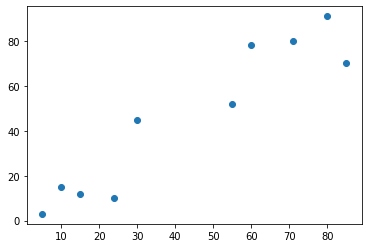

In [7]:
plt.scatter(x[:,0],x[:,1],label='True Position')

From the figure, if we have to form two clusters of the above data points, we will probably make one cluster of five points on the bottom left and one cluster of five points on the top right. Let's see if our K-means clustering algorithm does the same or not.

### Create Clusters
To create a K-means cluster with two clusters:

In [19]:
from sklearn.cluster import KMeans
Km=KMeans(n_clusters=2)
Km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In the first line, you create a KMeans object and pass it 2 as value for n_clusters parameter. Next, you simply have to call the fit method on kmeans and pass the data that you want to cluster, which in this case is the X array that we created earlier.

Type Markdown and LaTeX: 
𝛼
2
α2

Now let's see what centroid values the algorithm generated for the final clusters:

In [11]:
print(Km.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


In [13]:
print(Km.labels_)

[1 1 1 1 1 0 0 0 0 0]


Here the first five points have been clustered together and the last five points have been clustered. Here 0 and 1 are merely used to represent cluster IDs and have no mathematical significance. If there were three clusters, the third cluster would have been represented by digit 2.

Let's plot the data points again on the graph and visualize how the data has been clustered. This time we will plot the data along with their assigned label so that we can distinguish between the clusters:

AttributeError: 'KMeans' object has no attribute 'cluster_center_'

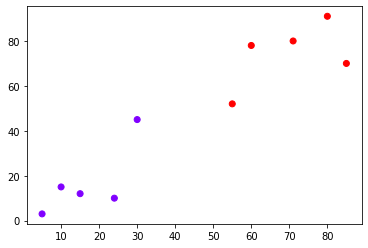

In [20]:
plt.scatter(x[:,0],x[:,1],c=Km.labels_,cmap="rainbow")
plt.scatter(Km.cluster_center_[:,0],Km.cluster_center_[:,1],color="black")

Here we are plotting the first column of the X array against the second column, however in this case we are also passing kmeans.labels_ as value for the c parameter that corresponds to labels. The cmap='rainbow' parameter is passed for choosing the color type for the different data points. 

As expected, the first five points on the bottom left have been clustered together (displayed with blue), while the remaining points on the top right have been clustered together (displayed with red).

Now let's execute K-means algorithm with three clusters and see the output graph:

In [15]:
Km=KMeans(n_clusters=3)
Km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

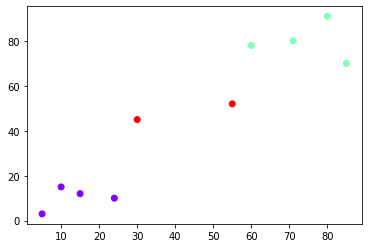

In [16]:
plt.scatter(x[:,0],x[:,1],c=Km.labels_,cmap="rainbow")

You can see that again the points that are close to each other have been clustered together.

Now let's plot the points along with the centroid coordinates of each cluster to see how the centroid positions effects clustering. Again we will use three clusters to see the effect of centroids: 

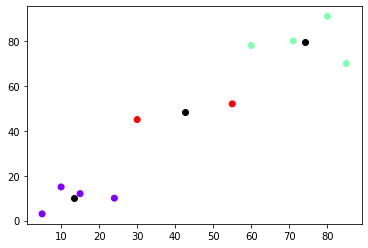

In [18]:
plt.scatter(x[:,0], x[:,1], c=Km.labels_, cmap='rainbow')
plt.scatter(Km.cluster_centers_[:,0] ,Km.cluster_centers_[:,1], color='black')

In case of three clusters, the two points in the middle (displayed in red) have distance closer to the centroid in the middle (displayed in black between the two reds), as compared to the centroids on the bottom left or top right. However if there were two clusters, there wouldn't have been a centroid in the center, hence the red points would have to be clustered together with the points in the bottom left or top right clusters.